# CS5339 Project

# Data sorting

Train Pos


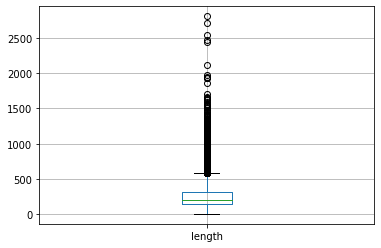

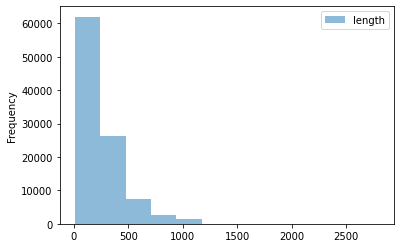

In [1]:
import pandas as pd

%matplotlib inline

from tempfile import mkstemp
from shutil import move, copymode
from os import fdopen, remove
import re

def replace(file_path):
    #Create temp file
    fh, abs_path = mkstemp()
    with fdopen(fh,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(re.sub("  " , " ", line))

    #Copy the file permissions from the old file to the new file
    copymode(file_path, abs_path)
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

# replace('aclImdb/test-neg.txt')
# replace('aclImdb/train-pos.txt')
# replace('aclImdb/test-pos.txt')
# replace('aclImdb/test-neg.txt')
# replace('aclImdb/train-unsup.txt')
replace('aclImdb/alldata.txt')


train_neg = pd.read_csv('aclImdb/train-neg.txt', header = None, delimiter = "\n")
train_pos = pd.read_csv('aclImdb/train-pos.txt', header = None, delimiter = "\n")
train_unsup = pd.read_csv('aclImdb/train-unsup.txt', header = None, delimiter = "\n")
test_pos = pd.read_csv('aclImdb/test-pos.txt', header = None, delimiter = "\n")
test_neg = pd.read_csv('aclImdb/test-neg.txt', header = None, delimiter = "\n")
all_data = pd.read_csv('aclImdb/alldata.txt', header = None, delimiter = "\n")

# print(train_neg)
data = [train_neg, train_pos, train_unsup, test_pos, test_neg]

# print("Train Neg")
# train_neg['length'] = cat[0].str.split().map(len)
# train_neg.boxplot(column=['length'])
# train_neg.plot.hist(bins=12, alpha=0.5)

print("Train Pos")
all_data['length'] = all_data[0].str.split().map(len)
all_data.boxplot(column=['length'])
all_data.plot.hist(bins=12, alpha=0.5)


# print(train_neg[0][0])

# all_data.head(20)



# all_train = pd.concat([train_neg, train_pos, train_unsup], ignore_index=True)

# all_train.head(10)



## Load dataset
https://ai.stanford.edu/~amaas/data/sentiment/

In [2]:
import gensim
from collections import namedtuple
from gensim.models.doc2vec import TaggedDocument

SentimentDocument = namedtuple('IMDB', 'words tags split sentiment')

alldocs = []  # will hold all docs in original order
# with open('aclImdb/alldata-id.txt') as alldata:
#     for line_no, line in enumerate(alldata):
#         tokens = gensim.utils.to_unicode(line).split()
#         words = tokens[1:]
#         tags = [line_no] 
        
#         # 25k train, 25k test, 50k unlabled data
#         split = ['train','test','train-unsup','train-unsup'][line_no//25000]  
#         # [12.5K pos, 12.5K neg]*2 then 50k unlabled data
#         sentiment = [1.0, 0.0, 1.0, 0.0, None, None, None, None][line_no//12500] 
#         alldocs.append(SentimentDocument(words, tags, split, sentiment))

current_line = 0
with open('aclImdb/train-neg.txt') as alldata:
    for line_no, line in enumerate(alldata):
        
        tokens = gensim.utils.to_unicode(line).split()
        if len(tokens)<=200:
            continue
        words = tokens[1:]
        tags = [current_line]
        current_line += 1
        split = 'train'
        sentiment = 0
        alldocs.append(SentimentDocument(words, tags, split, sentiment))
        
with open('aclImdb/train-pos.txt') as alldata:
    for line_no, line in enumerate(alldata):
        tokens = gensim.utils.to_unicode(line).split()
        if len(tokens)<=200:
            continue
        words = tokens[1:]
        tags = [current_line]
        current_line += 1
        split = 'train'
        sentiment = 1.0
        alldocs.append(SentimentDocument(words, tags, split, sentiment))
        
with open('aclImdb/test-pos.txt') as alldata:
    for line_no, line in enumerate(alldata):
        tokens = gensim.utils.to_unicode(line).split()
        if len(tokens)<=200:
            continue
        words = tokens[1:]
        tags = [current_line]
        current_line += 1
        split = 'test'
        sentiment = 1.0
        alldocs.append(SentimentDocument(words, tags, split, sentiment))
        
with open('aclImdb/test-neg.txt') as alldata:
    for line_no, line in enumerate(alldata):
        tokens = gensim.utils.to_unicode(line).split()
        if len(tokens)<=200:
            continue
        words = tokens[1:]
        tags = [current_line]
        current_line += 1
        split = 'test'
        sentiment = 0
        alldocs.append(SentimentDocument(words, tags, split, sentiment))
        


with open('aclImdb/train-unsup.txt') as alldata:
    for line_no, line in enumerate(alldata):
        tokens = gensim.utils.to_unicode(line).split()
        if len(tokens)<=200:
            continue
        words = tokens[1:]
        tags = [current_line]
        current_line += 1
        split = 'train-unsup'
        sentiment = None
        alldocs.append(SentimentDocument(words, tags, split, sentiment))

train_docs = [doc for doc in alldocs if doc.split == 'train']
test_docs = [doc for doc in alldocs if doc.split == 'test']
unlabeled = [doc for doc in alldocs if doc.split == 'train-unsup']
doc_list = alldocs[:]  # for reshuffling per epoch

print('%d docs: %d train-sentiment, %d test-sentiment, %d unlabeled' % (len(doc_list), len(train_docs), len(test_docs), len(unlabeled)))

unable to import 'smart_open.gcs', disabling that module


48987 docs: 12241 train-sentiment, 12050 test-sentiment, 24696 unlabeled


In [3]:
# Check data
print(doc_list[199],'\n')
print(doc_list[17000],'\n')
print(doc_list[20000])

IMDB(words=['only', 'recently', 'found', 'out', 'that', 'madeleine', "l'engle's", 'novel', 'had', 'been', 'turned', 'into', 'a', 'tv', 'movie', 'by', 'disney', 'and', 'ordered', 'the', 'dvd', '.', 'the', 'book', 'was', 'a', 'favorite', 'of', 'mine', 'when', 'i', 'was', 'a', 'child', 'and', 'i', 'read', 'it', 'several', 'times', '.', 'despite', 'some', 'of', 'the', 'child', 'actors', 'not', 'resembling', 'the', 'characters', 'as', 'described', 'in', 'the', 'novel', ',', 'the', 'murry', 'family', 'is', 'well', 'cast', ',', 'with', 'a', 'likable', '(', 'if', 'too', 'pretty', ')', 'meg', 'at', 'the', 'center', 'and', 'a', 'charles', 'wallace', 'who', 'is', 'convincing', 'as', 'a', 'child', 'prodigy', 'without', 'becoming', 'irritating', '.', 'the', 'first', 'half', 'hour', 'is', 'promising', 'enough', ',', 'doing', 'a', 'good', 'job', 'in', 'establishing', 'the', 'relationships', 'between', 'the', 'lead', 'characters', 'and', 'at', 'setting', 'the', 'scene', '.', 'unfortunately', 'as', 'so

## Model

In [4]:
from gensim.models import Doc2Vec
import gensim.models.doc2vec
from collections import OrderedDict
import multiprocessing

cores = multiprocessing.cpu_count()
print('CPU Cores',cores)
assert gensim.models.doc2vec.FAST_VERSION > -1, "this will be painfully slow otherwise"

models = [
    # PV-DM w/concatenation  window size = 5  approximates paper's 10-word total window size
    Doc2Vec(dm=1, dm_concat=1, size=100, window=5, negative=5, hs=0, min_count=2, workers=cores),
    # PV-DBOW 
    Doc2Vec(dm=0, size=100, negative=5, hs=0, min_count=2, workers=cores),
    # PV-DM w/average
    Doc2Vec(dm=1, dm_mean=1, size=100, window=10, negative=5, hs=0, min_count=2, workers=cores),
]

# speed setup by sharing results of 1st model's vocabulary scan
models[0].build_vocab(alldocs)  # PV-DM/concat requires one special NULL word so it serves as template
print('PV-DM/C', models[0])
models[1].reset_from(models[0])
print('PV-DBOW', models[1])
models[2].reset_from(models[0])
print('PV-DM/M', models[2])

models_by_name = OrderedDict((str(model), model) for model in models)


CPU Cores 12


/usr/local/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


PV-DM/C Doc2Vec(dm/c,d100,n5,w5,mc2,s0.001,t12)
PV-DBOW Doc2Vec(dbow,d100,n5,mc2,s0.001,t12)
PV-DM/M Doc2Vec(dm/m,d100,n5,w10,mc2,s0.001,t12)


## Prediction

In [5]:
from collections import defaultdict
best_error = defaultdict(lambda :1.0)  # to selectively-print only best errors achieved

import numpy as np
import statsmodels.api as sm
from random import sample

# for timing
from contextlib import contextmanager
from timeit import default_timer
import time 

@contextmanager
def elapsed_timer():
    start = default_timer()
    elapser = lambda: default_timer() - start
    yield lambda: elapser()
    end = default_timer()
    elapser = lambda: end-start
    
def logistic_predictor_from_data(train_targets, train_regressors):
    logit = sm.Logit(train_targets, train_regressors)
    predictor = logit.fit(disp=0)
    #print(predictor.summary())
    return predictor

def error_rate_for_model(test_model, train_set, test_set, infer=False, infer_steps=3, infer_alpha=0.1, infer_subsample=0.1):
    """Report error rate on test_doc sentiments, using supplied model and train_docs"""

    train_targets, train_regressors = zip(*[(doc.sentiment, test_model.docvecs[doc.tags[0]]) for doc in train_set])
    train_regressors = sm.add_constant(train_regressors)
    predictor = logistic_predictor_from_data(train_targets, train_regressors)

    test_data = test_set
    if infer:
        if infer_subsample < 1.0:
            test_data = sample(test_data, int(infer_subsample * len(test_data)))
        test_regressors = [test_model.infer_vector(doc.words, steps=infer_steps, alpha=infer_alpha) for doc in test_data]
    else:
        test_regressors = [test_model.docvecs[doc.tags[0]] for doc in test_docs]
    test_regressors = sm.add_constant(test_regressors)
    
    # predict & evaluate
    test_predictions = predictor.predict(test_regressors)
    corrects = sum(np.rint(test_predictions) == [doc.sentiment for doc in test_data])
    errors = len(test_predictions) - corrects
    error_rate = float(errors) / len(test_predictions)
    return (error_rate, errors, len(test_predictions), predictor)

## Training word vectors and doc vectors

In [6]:
from random import shuffle
import datetime

alpha, min_alpha, passes = (0.025, 0.001, 20)
alpha_delta = (alpha - min_alpha) / passes

print("START %s" % datetime.datetime.now())

for epoch in range(passes):
    shuffle(doc_list)  # shuffling gets best results
    
    for name, train_model in models_by_name.items():
        # train
        duration = 'na'
        train_model.alpha, train_model.min_alpha = alpha, alpha
        with elapsed_timer() as elapsed:
            train_model.train(doc_list,total_examples=100000, epochs=epoch)
            duration = '%.1f' % elapsed()
            
        # evaluate
        eval_duration = ''
        with elapsed_timer() as eval_elapsed:
            err, err_count, test_count, predictor = error_rate_for_model(train_model, train_docs, test_docs)
        eval_duration = '%.1f' % eval_elapsed()
        best_indicator = ' '
        if err <= best_error[name]:
            best_error[name] = err
            best_indicator = '*' 
        print("%s%f : %i passes : %s %ss %ss" % (best_indicator, err, epoch + 1, name, duration, eval_duration))

        if ((epoch + 1) % 5) == 0 or epoch == 0:
            eval_duration = ''
            with elapsed_timer() as eval_elapsed:
                infer_err, err_count, test_count, predictor = error_rate_for_model(train_model, train_docs, test_docs, infer=True)
            eval_duration = '%.1f' % eval_elapsed()
            best_indicator = ' '
            if infer_err < best_error[name + '_inferred']:
                best_error[name + '_inferred'] = infer_err
                best_indicator = '*'
            print("%s%f : %i passes : %s %ss %ss" % (best_indicator, infer_err, epoch + 1, name + '_inferred', duration, eval_duration))

    print('completed pass %i at alpha %f' % (epoch + 1, alpha))
    alpha -= alpha_delta
    
print("END %s" % str(datetime.datetime.now()))

START 2020-04-18 19:20:17.263464
*0.499004 : 1 passes : Doc2Vec(dm/c,d100,n5,w5,mc2,s0.001,t12) 0.0s 0.2s
*0.482988 : 1 passes : Doc2Vec(dm/c,d100,n5,w5,mc2,s0.001,t12)_inferred 0.0s 4.1s
*0.499004 : 1 passes : Doc2Vec(dbow,d100,n5,mc2,s0.001,t12) 0.0s 0.2s
*0.490456 : 1 passes : Doc2Vec(dbow,d100,n5,mc2,s0.001,t12)_inferred 0.0s 1.4s
*0.499004 : 1 passes : Doc2Vec(dm/m,d100,n5,w10,mc2,s0.001,t12) 0.0s 0.2s
*0.497925 : 1 passes : Doc2Vec(dm/m,d100,n5,w10,mc2,s0.001,t12)_inferred 0.0s 1.9s
completed pass 1 at alpha 0.025000
*0.375851 : 2 passes : Doc2Vec(dm/c,d100,n5,w5,mc2,s0.001,t12) 18.0s 0.2s
*0.262407 : 2 passes : Doc2Vec(dbow,d100,n5,mc2,s0.001,t12) 9.7s 0.3s
*0.269544 : 2 passes : Doc2Vec(dm/m,d100,n5,w10,mc2,s0.001,t12) 12.6s 0.2s
completed pass 2 at alpha 0.023800
*0.286141 : 3 passes : Doc2Vec(dm/c,d100,n5,w5,mc2,s0.001,t12) 36.8s 0.2s
*0.139917 : 3 passes : Doc2Vec(dbow,d100,n5,mc2,s0.001,t12) 18.9s 0.3s
*0.196017 : 3 passes : Doc2Vec(dm/m,d100,n5,w10,mc2,s0.001,t12) 26.2s 0.

## Accuracy

In [7]:
# print best error rates achieved
for rate, name in sorted((rate, name) for name, rate in best_error.items()):
    print("%f %s" % (rate, name))

0.109129 Doc2Vec(dbow,d100,n5,mc2,s0.001,t12)
0.109544 Doc2Vec(dbow,d100,n5,mc2,s0.001,t12)_inferred
0.132033 Doc2Vec(dm/m,d100,n5,w10,mc2,s0.001,t12)
0.155602 Doc2Vec(dm/c,d100,n5,w5,mc2,s0.001,t12)
0.164315 Doc2Vec(dm/m,d100,n5,w10,mc2,s0.001,t12)_inferred
0.168465 Doc2Vec(dm/c,d100,n5,w5,mc2,s0.001,t12)_inferred


In [8]:
infer_err, err_count, test_count, predictor = error_rate_for_model(train_model, train_docs, test_docs, infer=True)
print(infer_err)
print(predictor)

0.2091286307053942
